In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('bank-full.csv')

In [3]:
dataset.head()
#We see many categorical variables here

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


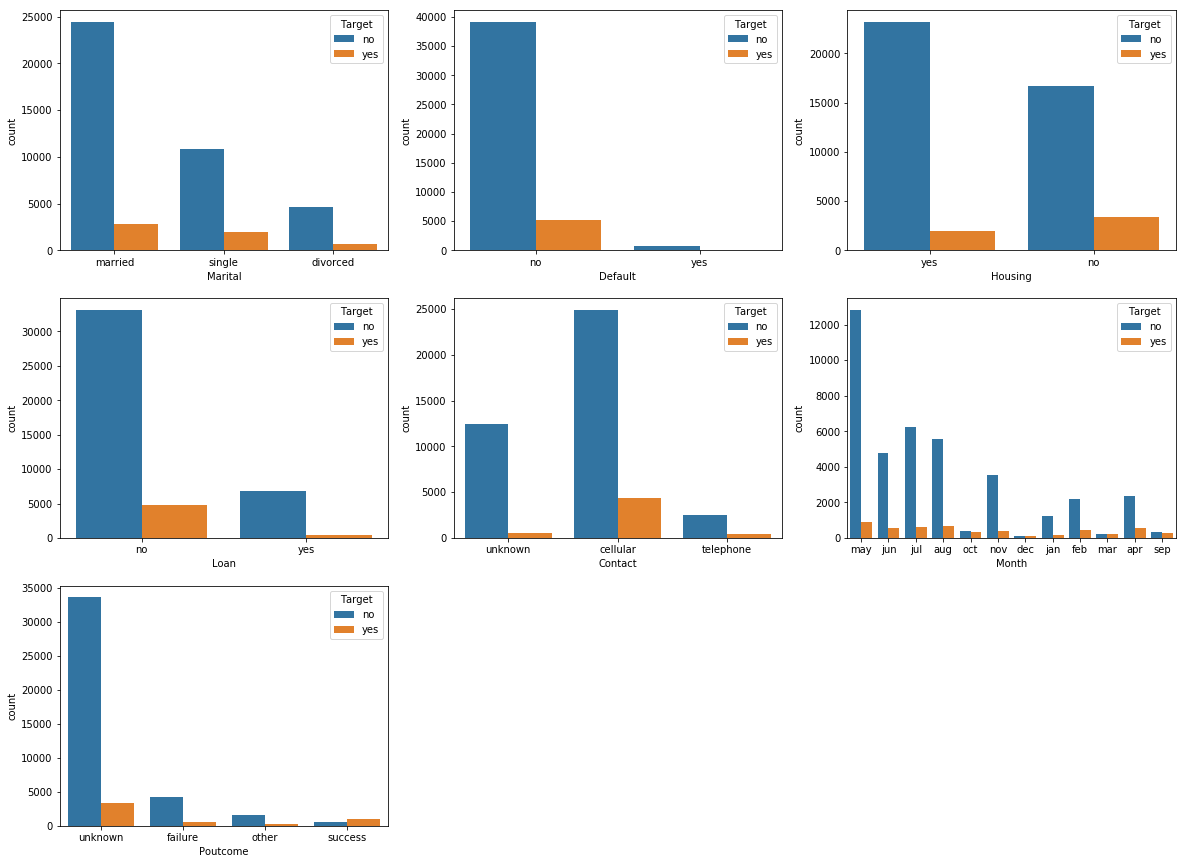

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.countplot(dataset.marital,hue=dataset['Target'])
plt.xlabel('Marital')

plt.subplot(3,3,2)
sns.countplot(dataset.default,hue=dataset['Target'])
plt.xlabel('Default')

plt.subplot(3,3,3)
sns.countplot(dataset.housing,hue=dataset['Target'])
plt.xlabel('Housing')

plt.subplot(3,3,4)
sns.countplot(dataset.loan,hue=dataset['Target'])
plt.xlabel('Loan')

plt.subplot(3,3,5)
sns.countplot(dataset.contact,hue=dataset['Target'])
plt.xlabel('Contact')

plt.subplot(3,3,6)
sns.countplot(dataset.month,hue=dataset['Target'])
plt.xlabel('Month')


plt.subplot(3,3,7)
sns.countplot(dataset.poutcome,hue=dataset['Target'])
plt.xlabel('Poutcome')

plt.show()

In [7]:
#here we can see that highest number of people who can be fit for the campaign :
#married , having cellular contact , month may who dont have loan

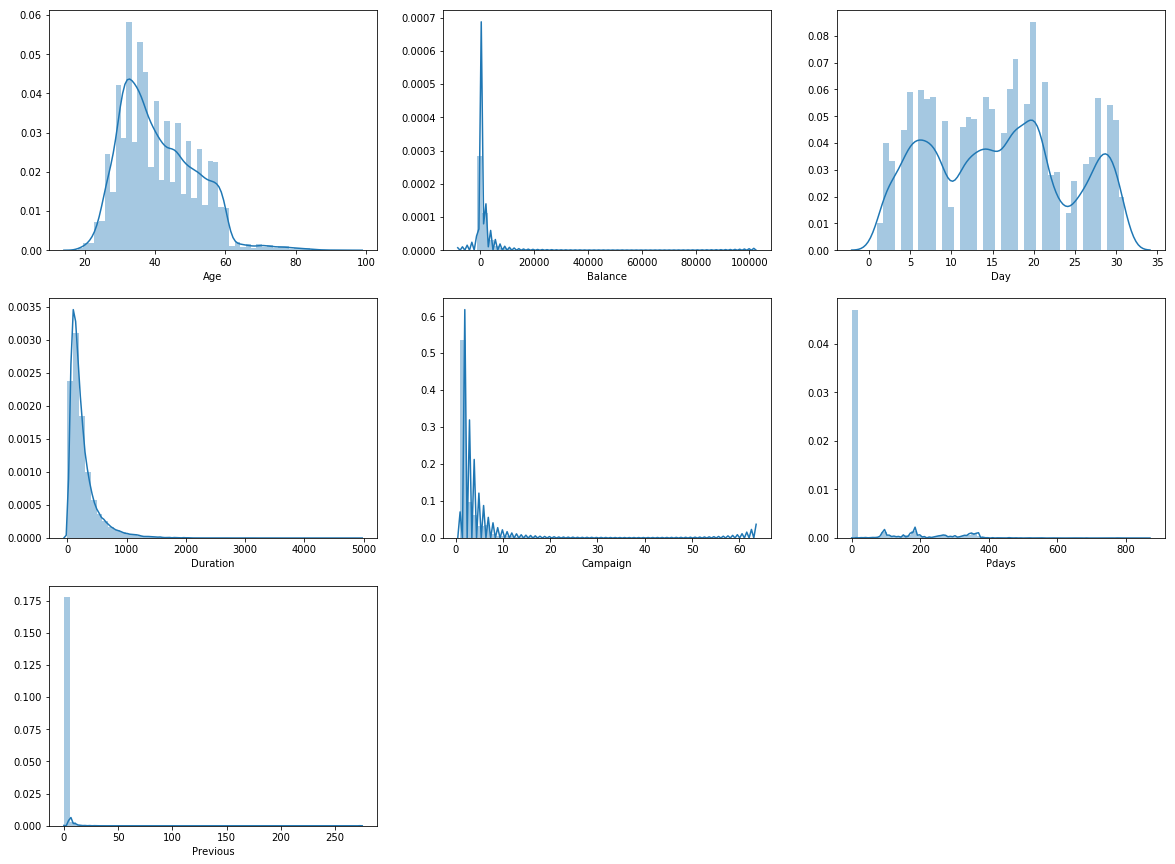

In [8]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,1)
sns.distplot(dataset.age)
plt.xlabel('Age')

plt.subplot(3,3,2)
sns.distplot(dataset.balance)
plt.xlabel('Balance')

plt.subplot(3,3,3)
sns.distplot(dataset.day)
plt.xlabel('Day')

plt.subplot(3,3,4)
sns.distplot(dataset.duration)
plt.xlabel('Duration')

plt.subplot(3,3,5)
sns.distplot(dataset.campaign)
plt.xlabel('Campaign')

plt.subplot(3,3,6)
sns.distplot(dataset.pdays)
plt.xlabel('Pdays')
 

plt.subplot(3,3,7)
sns.distplot(dataset.previous)
plt.xlabel('Previous')

plt.show()

#Most of tbe data seems extremely skewed

In [9]:
#This is to check the correlations between categorical variables
from scipy.stats import chisquare,chi2_contingency
from scipy.stats import chi2
def dependentOrIndependent(variable):
    cross=pd.crosstab(variable,dataset['Target'])
    stat, p, dof, expected = chi2_contingency(cross)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

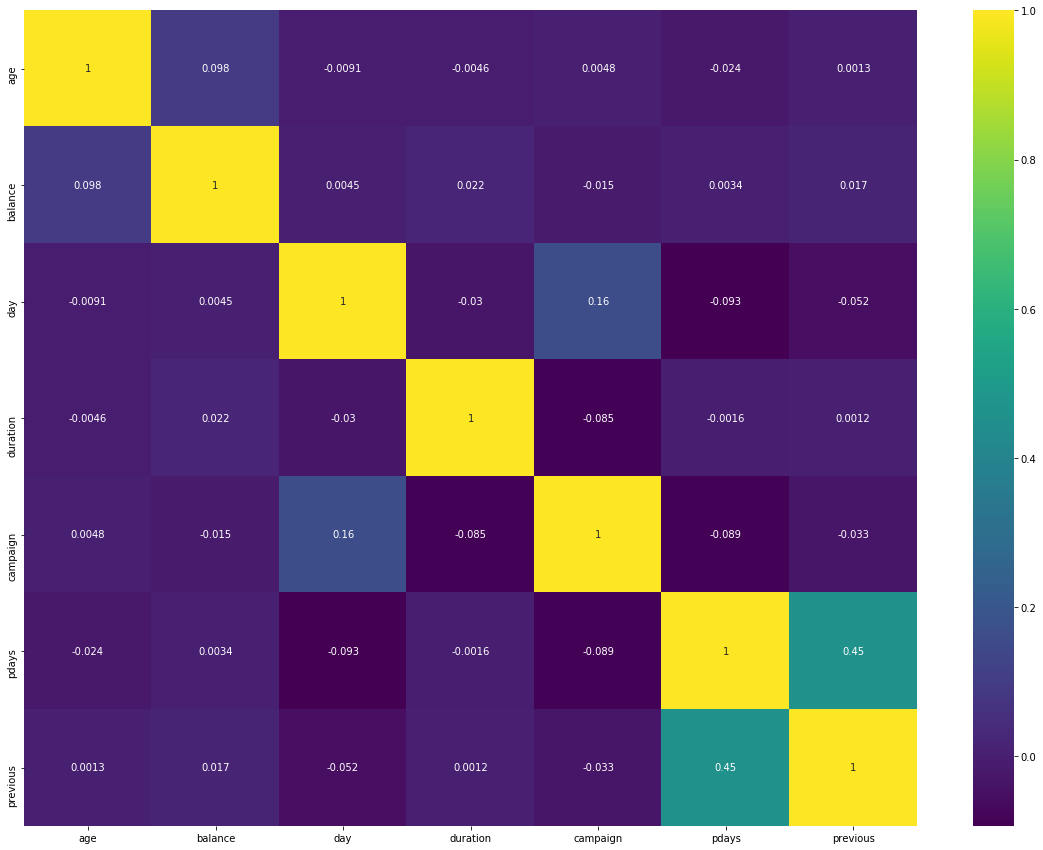

In [10]:
corr = dataset.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="viridis")

In [11]:
#As pdays and previous are strongly correlated we only will use one of them we will use previous.

In [12]:
from scipy.stats import skew as sk
sk(dataset['age'])

0.6847952047866451

In [13]:
sk(dataset['balance'])

8.360030947252687

In [14]:
sk(dataset['campaign'])

4.898487638410557

In [15]:
sk(dataset['day'])

0.09307592583897241

In [16]:
sk(dataset['duration'])

3.1442137770103913

In [17]:
sk(dataset['pdays'])

2.615628689259389

In [18]:
sk(dataset['previous'])

41.84506608797322

In [19]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
#Here we see previous, balance, duration, pdays, campaign has high skewness

In [21]:
dependentOrIndependent(dataset['job'])

Dependent (reject H0)


In [22]:
dependentOrIndependent(dataset['marital'])

Dependent (reject H0)


In [23]:
dependentOrIndependent(dataset['education'])

Dependent (reject H0)


In [24]:
dependentOrIndependent(dataset['default'])

Dependent (reject H0)


In [25]:
dependentOrIndependent(dataset['housing'])

Dependent (reject H0)


In [26]:
dependentOrIndependent(dataset['loan'])

Dependent (reject H0)


In [27]:
dependentOrIndependent(dataset['contact'])

Dependent (reject H0)


In [28]:
dependentOrIndependent(dataset['month'])

Dependent (reject H0)


In [29]:
dependentOrIndependent(dataset['poutcome'])

Dependent (reject H0)


In [30]:
dependentOrIndependent(dataset['previous'])

Dependent (reject H0)


In [31]:
dependentOrIndependent(dataset['balance'])

Dependent (reject H0)


In [32]:
def groupByAge(A):
    A.loc[(A['age'] > 10) & (A['age'] < 30) ,'age'] = 0
    A.loc[(A['age'] >= 30) & (A['age'] < 40) ,'age'] = 1
    A.loc[(A['age'] >= 40) & (A['age'] < 50) ,'age'] = 2
    A.loc[(A['age'] >= 50) & (A['age'] < 60) ,'age'] = 3
    A.loc[(A['age'] >= 60)] = 4
#grouping ages in intervals

In [33]:
def groupByDay(A):
    A.loc[(A['day'] > 0) & (A['day'] < 5) ,'day'] = 0
    A.loc[(A['day'] >= 5) & (A['day'] < 10) ,'day'] = 1
    A.loc[(A['day'] >= 10) & (A['day'] < 15) ,'day'] = 2
    A.loc[(A['day'] >= 15) & (A['day'] < 20) ,'day'] = 3
    A.loc[(A['day'] >= 20) & (A['day'] < 25) ,'day'] = 4
    A.loc[(A['day'] >= 25) & (A['day'] < 30) ,'day'] = 4
    A.loc[(A['day'] >= 30)] = 4

In [34]:
def groupByBalance(A):
    A.loc[(A['balance'] > -9000) & (A['balance'] < -8000) ,'balance'] = 0
    A.loc[(A['balance'] >= -8000) & (A['balance'] < -7000) ,'balance'] = 1
    A.loc[(A['balance'] >= -7000) & (A['balance'] < -6000) ,'balance'] = 2
    A.loc[(A['balance'] >= -6000) & (A['balance'] < -5000) ,'balance'] = 3
    A.loc[(A['balance'] >= -5000) & (A['balance'] < -4000) ,'balance'] = 4
    A.loc[(A['balance'] >= -3000) & (A['balance'] < -2000) ,'balance'] = 5
    A.loc[(A['balance'] >= -2000) & (A['balance'] < -1000) ,'balance'] = 6
    A.loc[(A['balance'] >= -1000) & (A['balance'] < 0 ,'balance')] = 7
    A.loc[(A['balance'] >= 0) & (A['balance'] < 1000 ,'balance')] = 8
    A.loc[(A['balance'] >= 1000) & (A['balance'] < 2000 ,'balance')] = 9
    A.loc[(A['balance'] >= 2000) & (A['balance'] < 3000 ,'balance')] = 10
    A.loc[(A['balance'] >= 3000) & (A['balance'] < 4000 ,'balance')] = 11
    A.loc[(A['balance'] >= 4000) & (A['balance'] < 5000 ,'balance')] = 12
    A.loc[(A['balance'] >= 5000) & (A['balance'] < 6000 ,'balance')] = 13
    A.loc[(A['balance'] >= 6000) & (A['balance'] < 7000 ,'balance')] = 14
    A.loc[(A['balance'] >= 7000) & (A['balance'] < 8000 ,'balance')] = 15
    A.loc[(A['balance'] >= 8000) & (A['balance'] < 9000 ,'balance')] = 16
    A.loc[(A['balance'] >= 9000) & (A['balance'] < 10000 ,'balance')] = 17
    A.loc[(A['balance'] >= 10000),'balance'] = 18

In [35]:
dataset['age'].head()

0    58
1    44
2    33
3    47
4    33
Name: age, dtype: int64

/Users/ashish/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


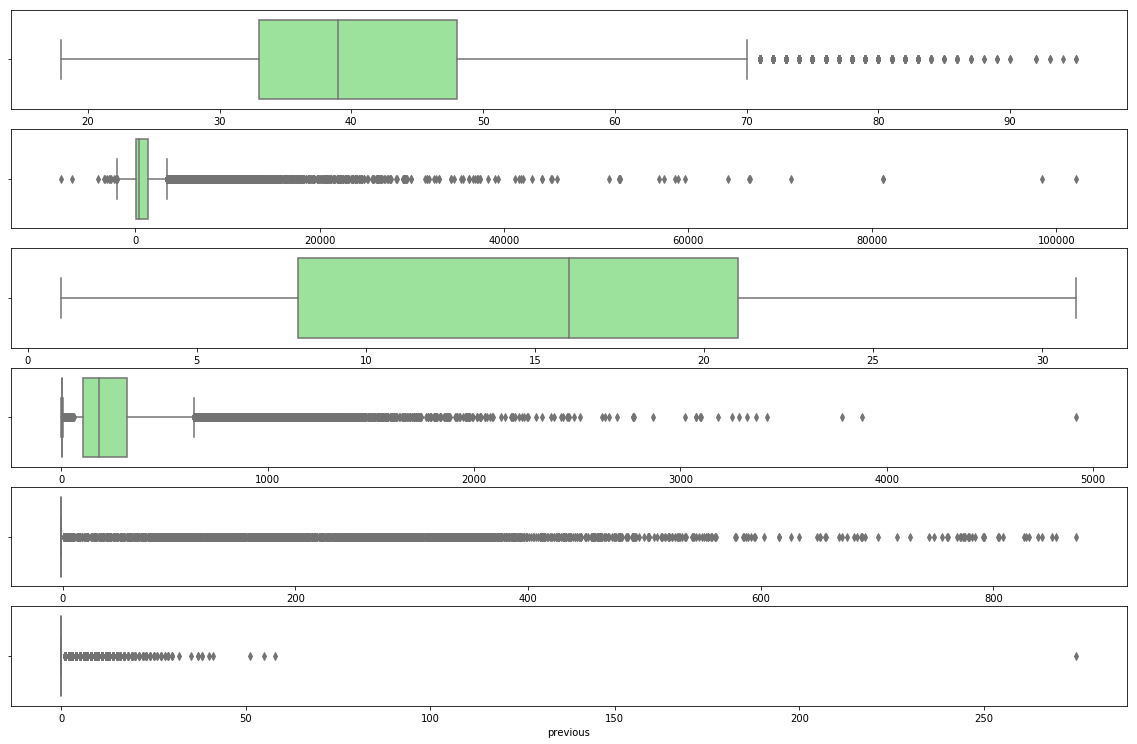

In [36]:
plt.figure(figsize= (20,15))
plt.subplot(7,1,1)
sns.boxplot(x= dataset.age, color='lightgreen')

plt.subplot(7,1,2)
sns.boxplot(x= dataset.balance, color='lightgreen')

plt.subplot(7,1,3)
sns.boxplot(x= dataset.day, color='lightgreen')
plt.subplot(7,1,4)
sns.boxplot(x= dataset.duration, color='lightgreen')

plt.subplot(7,1,4)
sns.boxplot(x= dataset.campaign, color='lightgreen')

plt.subplot(7,1,5)
sns.boxplot(x= dataset.pdays, color='lightgreen')

plt.subplot(7,1,6)
sns.boxplot(x= dataset.previous, color='lightgreen')

plt.show()

In [37]:
dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [38]:
#we see number of unique values for all the columns.

In [39]:
#Many outliers are present in every continues variable only the day column seems good.

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [41]:
#we see many columns are strings as object and we need to either use one hot encoding or label encoding for the same

In [42]:
#We are dropping these columns as their distribution is extremely skewed and doesnt contain much useful information.
dropped_dataset_1=dataset.drop(columns=['pdays','poutcome','pdays'])

In [43]:
dropped_dataset_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,no


In [44]:
groupByAge(dropped_dataset_1)
groupByDay(dropped_dataset_1)
dropped_dataset_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
0,3,management,married,tertiary,no,2143,yes,no,unknown,1,may,261,1,0,no
1,2,technician,single,secondary,no,29,yes,no,unknown,1,may,151,1,0,no
2,1,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,may,76,1,0,no
3,2,blue-collar,married,unknown,no,1506,yes,no,unknown,1,may,92,1,0,no
4,1,unknown,single,unknown,no,1,no,no,unknown,1,may,198,1,0,no


In [45]:
dropped_dataset_1['loan'] = pd.Categorical(dataset['loan']).codes 
dropped_dataset_1['housing'] = pd.Categorical(dataset['housing']).codes 
dropped_dataset_1['default'] = pd.Categorical(dataset['default']).codes 
dropped_dataset_1['Target'] = pd.Categorical(dataset['Target']).codes 
dropped_dataset_1['education'] = pd.Categorical(dataset['education']).codes 

dropped_dataset_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target
0,3,management,married,2,0,2143,1,0,unknown,1,may,261,1,0,0
1,2,technician,single,1,0,29,1,0,unknown,1,may,151,1,0,0
2,1,entrepreneur,married,1,0,2,1,1,unknown,1,may,76,1,0,0
3,2,blue-collar,married,3,0,1506,1,0,unknown,1,may,92,1,0,0
4,1,unknown,single,3,0,1,0,0,unknown,1,may,198,1,0,0


In [46]:
#we used label encoding as these columns only had 2 outcomes yes or no

In [47]:
one_hot = pd.get_dummies(dataset['marital'])
dropped_dataset_1 = dropped_dataset_1.drop('marital',axis = 1)
dropped_dataset_1 = dropped_dataset_1.join(one_hot)
dropped_dataset_1.head()


,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target,divorced,married,single
0,3,management,2,0,2143,1,0,unknown,1,may,261,1,0,0,0,1,0
1,2,technician,1,0,29,1,0,unknown,1,may,151,1,0,0,0,0,1
2,1,entrepreneur,1,0,2,1,1,unknown,1,may,76,1,0,0,0,1,0
3,2,blue-collar,3,0,1506,1,0,unknown,1,may,92,1,0,0,0,1,0
4,1,unknown,3,0,1,0,0,unknown,1,may,198,1,0,0,0,0,1


In [48]:
dropped_dataset_1=dropped_dataset_1.drop('divorced',axis = 1)
dropped_dataset_1.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,Target,married,single
0,3,management,2,0,2143,1,0,unknown,1,may,261,1,0,0,1,0
1,2,technician,1,0,29,1,0,unknown,1,may,151,1,0,0,0,1
2,1,entrepreneur,1,0,2,1,1,unknown,1,may,76,1,0,0,1,0
3,2,blue-collar,3,0,1506,1,0,unknown,1,may,92,1,0,0,1,0
4,1,unknown,3,0,1,0,0,unknown,1,may,198,1,0,0,0,1


In [49]:
one_hot = pd.get_dummies(dataset['contact'])
dropped_dataset_1 = dropped_dataset_1.drop('contact',axis = 1)
dropped_dataset_1 = dropped_dataset_1.join(one_hot)
dropped_dataset_1.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,previous,Target,married,single,cellular,telephone,unknown
0,3,management,2,0,2143,1,0,1,may,261,1,0,0,1,0,0,0,1
1,2,technician,1,0,29,1,0,1,may,151,1,0,0,0,1,0,0,1
2,1,entrepreneur,1,0,2,1,1,1,may,76,1,0,0,1,0,0,0,1
3,2,blue-collar,3,0,1506,1,0,1,may,92,1,0,0,1,0,0,0,1
4,1,unknown,3,0,1,0,0,1,may,198,1,0,0,0,1,0,0,1


In [50]:
dropped_dataset_1=dropped_dataset_1.drop('unknown',axis = 1)
dropped_dataset_1.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,previous,Target,married,single,cellular,telephone
0,3,management,2,0,2143,1,0,1,may,261,1,0,0,1,0,0,0
1,2,technician,1,0,29,1,0,1,may,151,1,0,0,0,1,0,0
2,1,entrepreneur,1,0,2,1,1,1,may,76,1,0,0,1,0,0,0
3,2,blue-collar,3,0,1506,1,0,1,may,92,1,0,0,1,0,0,0
4,1,unknown,3,0,1,0,0,1,may,198,1,0,0,0,1,0,0


In [51]:
one_hot = pd.get_dummies(dataset['job'])
dropped_dataset_1 = dropped_dataset_1.drop('job',axis = 1)
dropped_dataset_1 = dropped_dataset_1.join(one_hot)
dropped_dataset_1.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,3,2,0,2143,1,0,1,may,261,1,...,0,0,1,0,0,0,0,0,0,0
1,2,1,0,29,1,0,1,may,151,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,2,1,1,1,may,76,1,...,1,0,0,0,0,0,0,0,0,0
3,2,3,0,1506,1,0,1,may,92,1,...,0,0,0,0,0,0,0,0,0,0
4,1,3,0,1,0,0,1,may,198,1,...,0,0,0,0,0,0,0,0,0,1


In [52]:
dropped_dataset_1=dropped_dataset_1.drop('management',axis = 1)
dropped_dataset_1.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,blue-collar,entrepreneur,housemaid,retired,self-employed,services,student,technician,unemployed,unknown
0,3,2,0,2143,1,0,1,may,261,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,29,1,0,1,may,151,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,2,1,1,1,may,76,1,...,0,1,0,0,0,0,0,0,0,0
3,2,3,0,1506,1,0,1,may,92,1,...,1,0,0,0,0,0,0,0,0,0
4,1,3,0,1,0,0,1,may,198,1,...,0,0,0,0,0,0,0,0,0,1


In [53]:
one_hot = pd.get_dummies(dataset['month'])
dropped_dataset_1 = dropped_dataset_1.drop('month',axis = 1)
dropped_dataset_1 = dropped_dataset_1.join(one_hot)
dropped_dataset_1.head()

,age,education,default,balance,housing,loan,day,duration,campaign,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,3,2,0,2143,1,0,1,261,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,29,1,0,1,151,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,2,1,1,1,76,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2,3,0,1506,1,0,1,92,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,3,0,1,0,0,1,198,1,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
dropped_dataset_1=dropped_dataset_1.drop('dec',axis = 1)
dropped_dataset_1.head()

,age,education,default,balance,housing,loan,day,duration,campaign,previous,...,aug,feb,jan,jul,jun,mar,may,nov,oct,sep
0,3,2,0,2143,1,0,1,261,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,29,1,0,1,151,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,2,1,1,1,76,1,0,...,0,0,0,0,0,0,1,0,0,0
3,2,3,0,1506,1,0,1,92,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,3,0,1,0,0,1,198,1,0,...,0,0,0,0,0,0,1,0,0,0


In [55]:
Y=dropped_dataset_1['Target']
X=dropped_dataset_1.drop(['Target'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
test_size = 0.30 # taking 70:30 training and test set
# Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier()

In [58]:
dt_model.fit(X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
dt_model.score(X_train , y_train)

0.9890668941763833

In [60]:
dt_model.score(X_test , y_test)

0.8704659392509584

In [61]:
#This a case of overfitting as it it giving too much accuracy on the training data whereas accuracy drops much on the test data

In [62]:
treeFinal = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 max_leaf_nodes= 23,
 min_samples_leaf= 15,
 min_samples_split= 10)

In [63]:
#Now we build another tree by setting some hyperparameters.

In [64]:
treeFinal.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
treeFinal.score(X_test,y_test)


0.8883810085520495

In [66]:
y_pred=treeFinal.predict(X_test)

In [67]:
from sklearn import metrics
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     12647
           1       0.31      0.53      0.39       917

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.64      0.72      0.67     13564
weighted avg       0.92      0.89      0.90     13564



In [68]:
treeFinal.score(X_train , y_train)

0.8907005403355769

In [69]:
#Model is nicely fit equally on Decision tree on test as well as train data.

In [70]:
#Feature importance: we check for which features were used more specifically by the tree model so that we can eliminate the other not much relevant ones.
feat_importance = treeFinal.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(X.columns, treeFinal.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.554042
previous,0.150951
housing,0.139678
mar,0.036621
apr,0.026695
cellular,0.025742
day,0.017381
oct,0.015326
aug,0.012662
jun,0.007435


In [71]:
X_new=X.drop(['loan','sep','student','jul','jan','feb','nov','unknown','unemployed','technician','self-employed','education','housemaid','entrepreneur','blue-collar','admin.','single','married','campaign','balance','default','sep'],axis=1)

In [72]:
#By dropping few columns from see the feature importance we use the new cleaner data set for further training.

In [73]:
#we now use some random hyper parameters for every model we use

In [74]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=test_size)

In [75]:
treeFinalWithNewXFit = DecisionTreeClassifier(criterion= 'gini',
 max_depth= 6,
 max_leaf_nodes= 23)

In [76]:
treeFinalWithNewXFit.fit(X_train_new,y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
treeFinalWithNewXFit.score(X_train_new,y_train_new)

0.891332511770468

In [78]:
ypredfornewtree=treeFinalWithNewXFit.predict(X_test_new)

In [79]:
print(metrics.classification_report(ypredfornewtree,y_test_new))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12544
           1       0.34      0.53      0.42      1020

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.65      0.72      0.68     13564
weighted avg       0.91      0.89      0.90     13564



In [80]:
treeFinalWithNewXFit.score(X_test_new,y_test_new)

0.887791212031849

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada1=AdaBoostClassifier(base_estimator=treeFinalWithNewXFit,n_estimators=60,algorithm='SAMME')
ada1.fit(X_train_new,y_train_new)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=23,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=60, random_state=None)

In [82]:
ada1.score(X_train_new,y_train_new)

0.8999589218567321

In [83]:
ada1.score(X_test_new,y_test_new)

0.893246829843704

In [84]:
print(metrics.classification_report(ada1.predict(X_test_new),y_test_new))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     12484
           1       0.38      0.56      0.46      1080

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.67      0.74      0.70     13564
weighted avg       0.91      0.89      0.90     13564



In [85]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=treeFinalWithNewXFit,n_estimators=100,  bootstrap=True, oob_score=True)
bgcl = bgcl.fit(X_train_new, y_train_new)

In [86]:
bgcl.score(X_train_new, y_train_new)

0.8935128132208424

In [87]:
print(metrics.classification_report(bgcl.predict(X_test_new),y_test_new))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12701
           1       0.31      0.57      0.40       863

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.64      0.74      0.67     13564
weighted avg       0.93      0.89      0.91     13564



In [88]:
bgcl.score(X_test_new, y_test_new)


0.8914037157180773

In [133]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(min_samples_split = 40,min_samples_leaf = 3, n_estimators =600,bootstrap=True, oob_score=True)
rfcl = rfcl.fit(X_train_new, y_train_new)

In [134]:
rfcl.score(X_train_new,y_train_new)

0.9077637690776377

In [135]:
rfcl.score(X_test_new,y_test_new)

0.8959009141846063

In [136]:
print(metrics.classification_report(rfcl.predict(X_test_new),y_test_new))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12778
           1       0.30      0.61      0.41       786

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.64      0.76      0.67     13564
weighted avg       0.94      0.90      0.91     13564



In [137]:
#here we can see random forest performs best as well as it is nice fit on the training data set not overfit and performs best on the test data set as well

In [138]:
#Representation of 1 in the dataset is small hence the prediction metrics in that class are slightly weak.

In [139]:
(Y==0).sum()

39922

In [140]:
(Y==1).sum()

5289

In [141]:
#here our model was not so well trained for class 1 as it had under representation in the data set.